In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from konlpy.tag import Twitter
from collections import Counter
from wordcloud import WordCloud
from PIL import Image

In [2]:
def to_word_cloud(target_df, stop_word_df, word_num): # 워드클라우드 띄우고 싶은 데이터 프레임, 불용어 사전, 출력 단어 수

    # 리뷰를 하나의 리스트로 저장
    review_list = []
    for i in range(df.shape[0]):
        review_list.append(df.iloc[i]['리뷰'])
        
    # 토큰화
    tw = Twitter(jvmpath ="C:/Program Files/Java/jdk-18.0.2.1/bin/server/jvm.dll")
    tokenized = []
    
    for i in range(len(review_list)):
        tokenized.append(tw.morphs(review_list[i]))
        
    # 간단한 불용어 처리
    stop_word = list(stop_word_df['word'])
    result = []
    
    for i in range(len(tokenized)):
        for word in tokenized[i]:
            if word not in stop_word:
                result.append(word)
                
    # 단어 등장 수 구하기
    c_word = Counter(result)
    
    wc = WordCloud(font_path='malgun', max_words=word_num, width=400, height=400, scale=2.0, max_font_size=200)
    gen = wc.generate_from_frequencies(c_word)
    plt.figure()
    plt.imshow(gen)

In [3]:
url_1 = 'C:\\JupyterNotebook\\COIN\\에브리타임 강의 평가\\1. 크롤링\인문캠 에타 리뷰.csv'
url_2 = 'C:\\JupyterNotebook\\COIN\\에브리타임 강의 평가\\1. 크롤링\자연캠 에타 리뷰.csv'

df_1 = pd.read_csv(url_1)
df_2 = pd.read_csv(url_2)

# 자연캠 인문캠 합치기
df = pd.concat([df_1, df_2])

In [5]:
df.loc[df['평가별점수'] == 5, '평점'] = 'good'
df.loc[df['평가별점수'] <= 4, '평점'] = 'bad'

In [7]:
good_df = df.query("평점 == 'good'")
good_df

,캠퍼스,교수명,강의목록,리뷰,작성시점,평가별점수,공감수,평점
0,인문,강명훈,비교정치론,정치학도로써 새롭게 더 배우고 싶다면 추천할게요!\n수업 방식도 깔끔하고 좋습니다!...,22년 2학기 수강자,5,0,good
1,인문,강명훈,비교정치론,과제 없어서 일단 꿀이고 시험도 오픈북이라 매우 편함. 시험은 수업시간에 배운 내용...,22년 2학기 수강자,5,0,good
3,인문,강명훈,비교정치론,갓 명 훈 ~\n되게 깔끔하게 강의하시는 편이에요\n성격도 깔끔하심\n생각할 거리를...,22년 2학기 수강자,5,0,good
6,인문,방성운,자기경영과실전취업준비,교수님 학생들 많이 생각해주시고 너무 좋아요! 꼭 들어보시길 추천드릴게요!\n그런데...,22년 2학기 수강자,5,0,good
9,인문,방성운,자기경영과실전취업준비,취업에 관심을 가지기 시작할 때쯤인 3/4학년때 들으면 좋을 강의. 시험 없고 교수...,22년 2학기 수강자,5,0,good
...,...,...,...,...,...,...,...,...
12802,자연,교목실,채플,기승전하나님이긴한데 그냥 편하게 쉬는시간이라 좋음,18년 1학기 수강자,5,0,good
12806,자연,교목실,채플,채플 그냥 쉬다오는 시간임\n자지만않고 듣고 대충 소감문쓰면됨 \n안쓰면 출석인정 ...,18년 1학기 수강자,5,0,good
12808,자연,교목실,채플,과제와 연강에 지친당신 1시간만 자고 가도록 하게나,18년 1학기 수강자,5,0,good
12811,자연,교목실,채플,영어채플 앙개꿀띠 그냥 채플보다 훨씬 덜 졸림\n영어채플이라고 그렇게 영어로만 꽉꽉...,18년 1학기 수강자,5,0,good


In [8]:
stop_word_df = pd.read_excel('./Stopword Dictionary.xlsx')
stop_word_df

,word,class
0,",",NaN
1,.,NaN
2,..,NaN
3,…,NaN
4,은,NaN
...,...,...
626,/,NaN
627,※,NaN
628,\n,NaN
629,o,NaN


C:\Users\rlawl\anaconda3\lib\site-packages\konlpy\tag\_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


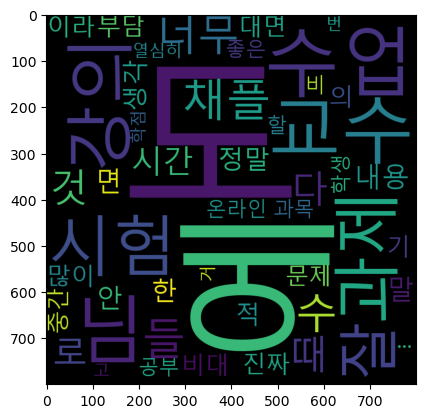

In [9]:
to_word_cloud(good_df, stop_word_df, 50)